# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

In [143]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [144]:
import pandas as pd

bos = pd.read_csv('boston.csv')
print(bos.shape)
bos.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [145]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [146]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [147]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

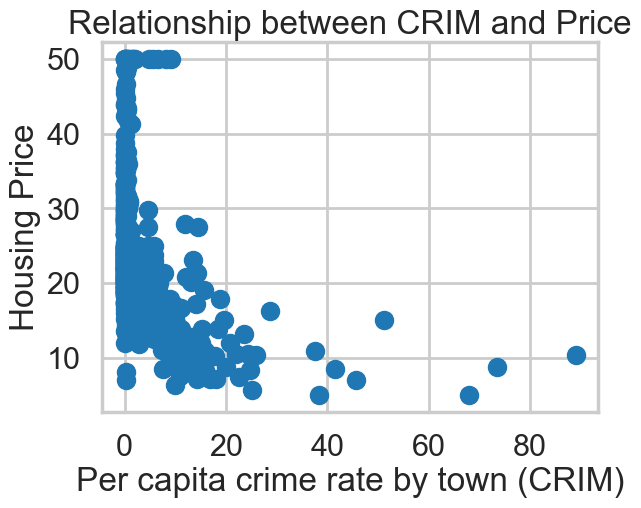

In [148]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship

There appears to be a negative, non-linear relationship between CRIM and housing prices. As the crime rate increases, housing prices tend to decline, with this trend being more pronounced when CRIM is below ~20. Interestingly, as CRIM increases, housing prices become less variable, suggesting that higher crime rates exert a stronger, more uniform downward pressure on prices. However, due to the limited number of data points above a CRIM of ~25, the trend is harder to determine with certainty at higher crime levels.

It is also notable that some outliers at relatively low CRIM levels (below 10) reach a maximum price of 50, which may suggest a price ceiling or cap in the dataset. In contrast, the majority of prices fall below 30, leaving a noticeable gap between 30 and 50.

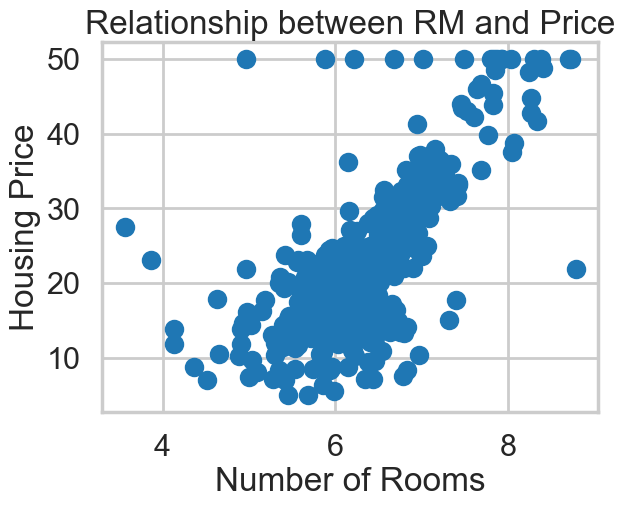

In [149]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Number of Rooms")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

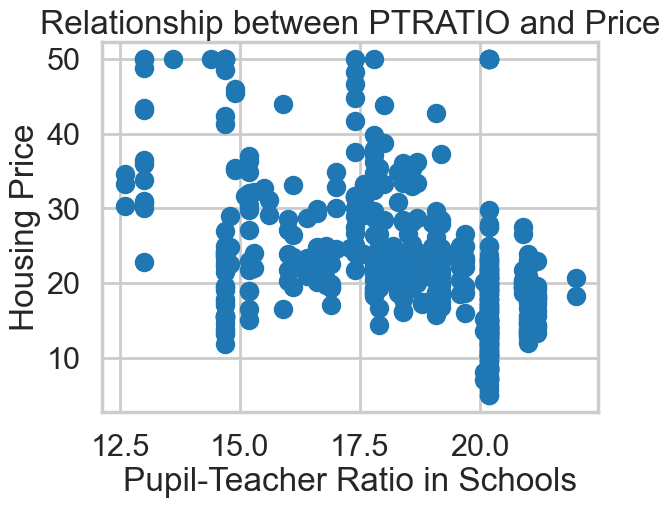

In [150]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-Teacher Ratio in Schools")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()

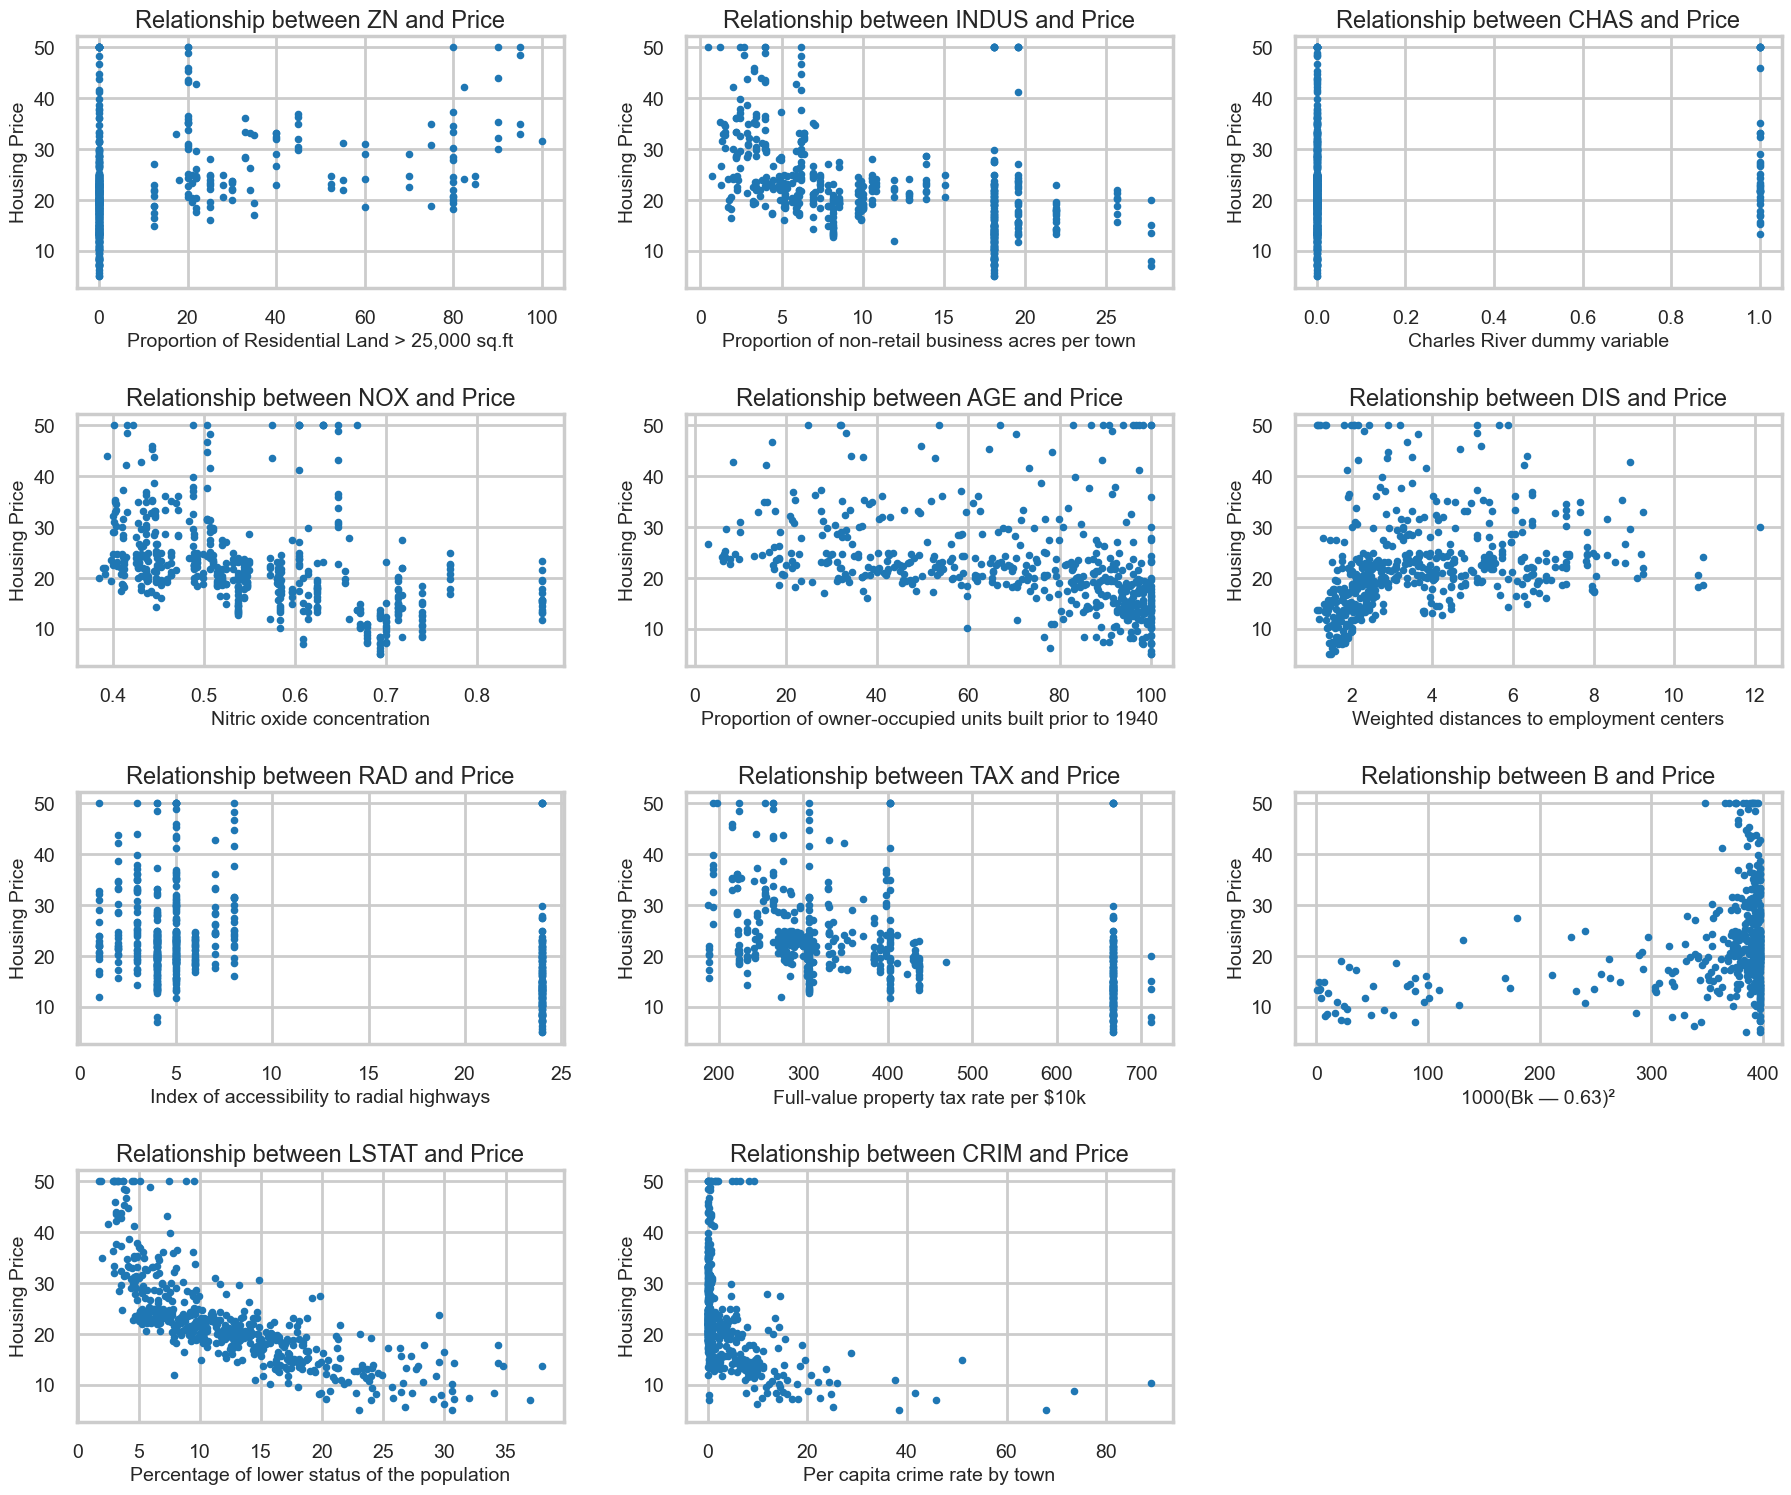

In [151]:
# your turn: create some other scatter plots
fig, ax = plt.subplots(4, 3, figsize=(22, 18))

marker_size = 12
title_size = 17
lable_size = 14
tick_size = 14

ax[0, 0].scatter(bos.ZN, bos.PRICE, s=marker_size)
ax[0, 0].set_title('Relationship between ZN and Price', fontsize=title_size)
ax[0, 0].set_xlabel('Proportion of Residential Land > 25,000 sq.ft', fontsize=lable_size)
ax[0, 0].set_ylabel('Housing Price', fontsize=lable_size)
ax[0, 0].tick_params(axis='both', labelsize=tick_size) 
ax[0, 0].autoscale()

ax[0, 1].scatter(bos.INDUS, bos.PRICE, s=marker_size)
ax[0, 1].set_title('Relationship between INDUS and Price', fontsize=title_size)
ax[0, 1].set_xlabel('Proportion of non-retail business acres per town', fontsize=lable_size)
ax[0, 1].set_ylabel('Housing Price', fontsize=lable_size)
ax[0, 1].tick_params(axis='both', labelsize=tick_size) 
ax[0, 1].autoscale()

ax[0, 2].scatter(bos.CHAS, bos.PRICE, s=marker_size)
ax[0, 2].set_title('Relationship between CHAS and Price', fontsize=title_size)
ax[0, 2].set_xlabel('Charles River dummy variable', fontsize=lable_size)
ax[0, 2].set_ylabel('Housing Price', fontsize=lable_size)
ax[0, 2].tick_params(axis='both', labelsize=tick_size) 
ax[0, 2].autoscale()

ax[1, 0].scatter(bos.NOX, bos.PRICE, s=marker_size)
ax[1, 0].set_title('Relationship between NOX and Price', fontsize=title_size)
ax[1, 0].set_xlabel('Nitric oxide concentration', fontsize=lable_size)
ax[1, 0].set_ylabel('Housing Price', fontsize=lable_size)
ax[1, 0].tick_params(axis='both', labelsize=tick_size) 
ax[1, 0].autoscale()

ax[1, 1].scatter(bos.AGE, bos.PRICE, s=marker_size)
ax[1, 1].set_title('Relationship between AGE and Price', fontsize=title_size)
ax[1, 1].set_xlabel('Proportion of owner-occupied units built prior to 1940', fontsize=lable_size)
ax[1, 1].set_ylabel('Housing Price', fontsize=lable_size)
ax[1, 1].tick_params(axis='both', labelsize=tick_size) 
ax[1, 1].autoscale()

ax[1, 2].scatter(bos.DIS, bos.PRICE, s=marker_size)
ax[1, 2].set_title('Relationship between DIS and Price', fontsize=title_size)
ax[1, 2].set_xlabel('Weighted distances to employment centers', fontsize=lable_size)
ax[1, 2].set_ylabel('Housing Price', fontsize=lable_size)
ax[1, 2].tick_params(axis='both', labelsize=tick_size) 
ax[1, 2].autoscale()

ax[2, 0].scatter(bos.RAD, bos.PRICE, s=marker_size)
ax[2, 0].set_title('Relationship between RAD and Price', fontsize=title_size)
ax[2, 0].set_xlabel('Index of accessibility to radial highways', fontsize=lable_size)
ax[2, 0].set_ylabel('Housing Price', fontsize=lable_size)
ax[2, 0].tick_params(axis='both', labelsize=tick_size) 
ax[2, 0].autoscale()

ax[2, 1].scatter(bos.TAX, bos.PRICE, s=marker_size)
ax[2, 1].set_title('Relationship between TAX and Price', fontsize=title_size)
ax[2, 1].set_xlabel('Full-value property tax rate per $10k', fontsize=lable_size)
ax[2, 1].set_ylabel('Housing Price', fontsize=lable_size)
ax[2, 1].tick_params(axis='both', labelsize=tick_size) 
ax[2, 1].autoscale()

ax[2, 2].scatter(bos.B, bos.PRICE, s=marker_size)
ax[2, 2].set_title('Relationship between B and Price', fontsize=title_size)
ax[2, 2].set_xlabel('1000(Bk — 0.63)²', fontsize=lable_size)
ax[2, 2].set_ylabel('Housing Price', fontsize=lable_size)
ax[2, 2].tick_params(axis='both', labelsize=tick_size) 
ax[2, 2].autoscale()

ax[3, 0].scatter(bos.LSTAT, bos.PRICE, s=marker_size)
ax[3, 0].set_title('Relationship between LSTAT and Price', fontsize=title_size)
ax[3, 0].set_xlabel('Percentage of lower status of the population', fontsize=lable_size)
ax[3, 0].set_ylabel('Housing Price', fontsize=lable_size)
ax[3, 0].tick_params(axis='both', labelsize=tick_size) 
ax[3, 0].autoscale()

ax[3, 1].scatter(bos.CRIM, bos.PRICE, s=marker_size)
ax[3, 1].set_title('Relationship between CRIM and Price', fontsize=title_size)
ax[3, 1].set_xlabel('Per capita crime rate by town', fontsize=lable_size)
ax[3, 1].set_ylabel('Housing Price', fontsize=lable_size)
ax[3, 1].tick_params(axis='both', labelsize=tick_size) 
ax[3, 1].autoscale()

ax[3, 2].set_visible(False)

plt.subplots_adjust(wspace=0.25, hspace=0.5)
plt.savefig('individual relationship with price.png', dpi=300, transparent=True)

plt.show()



### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

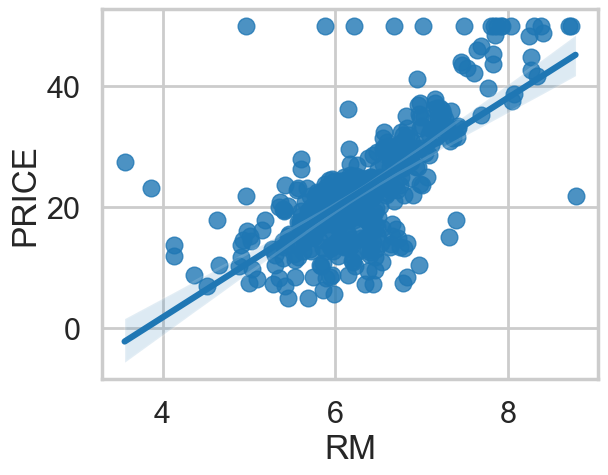

In [152]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.show()

### Histograms
***


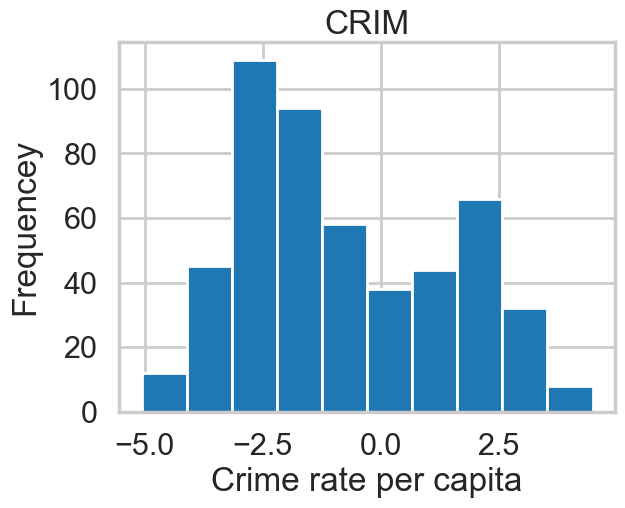

In [153]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

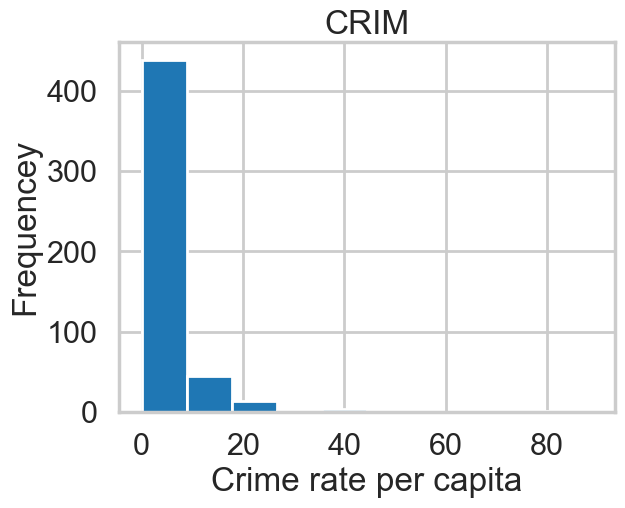

In [154]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Without log transformation, the original histogram of the CRIM data shows that the vast majority of crime rates per capita are concentrated below 10, with most of the data clustered near zero. This makes it difficult to see the distribution of the smaller values and to interpret the finer details of the data, as the higher values of CRIM stretch the scale. After applying the log transformation, the histogram provides a clearer view of the data, revealing that a significant portion of the crime rates fall below 1 on the log scale, which was not as apparent in the original scale. This transformation compresses the range of the higher values and spreads out the smaller ones, allowing us to see more subtle patterns and the distribution of smaller values that were previously hidden.
Purpose of the log transformation: The log transformation is useful because it: Reduces skewness, in datasets like this one, where there are a few very large values and many smaller values, the distribution can be highly skewed. Taking the log reduces this skew, making the distribution more symmetric and easier to interpret; Highlights finer details, by applying the log, the transformation highlights the variability among smaller values, which might otherwise be overshadowed by the large values.
What we gain by making this transformation: The transformation allows us to observe details in the lower range of the data and better understand the distribution of crime rates across towns. Specifically, more than half of the data falls below a log-transformed value of 1, which corresponds to crime rates close to or below 1 per capita. Without the transformation, this pattern is obscured by the few towns with very high crime rates.

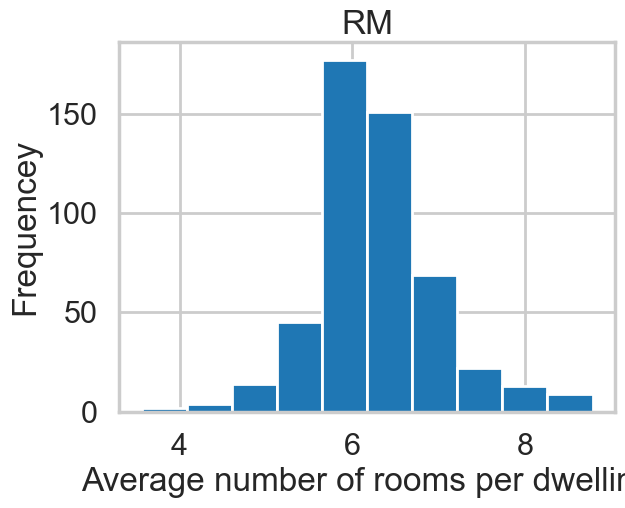

In [155]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Frequencey")
plt.show()

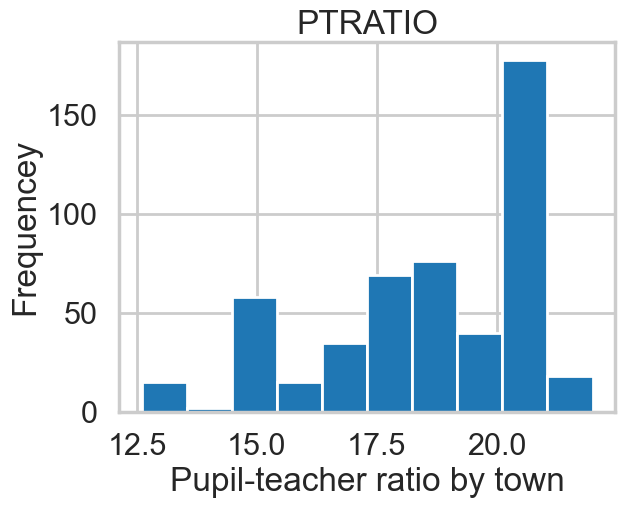

In [156]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequencey")
plt.show()

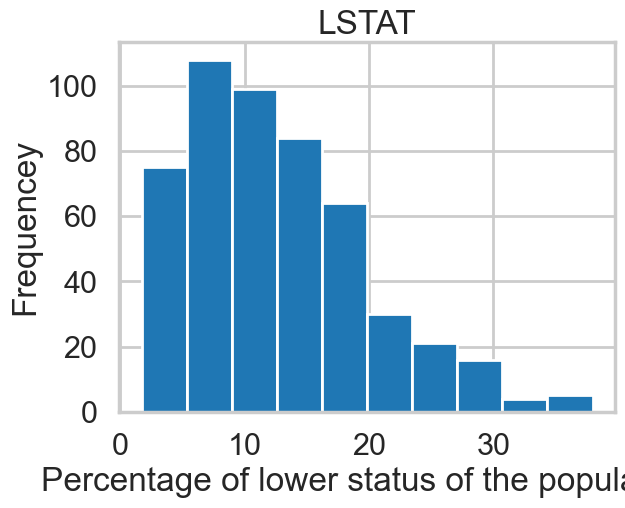

In [157]:
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("Percentage of lower status of the population")
plt.ylabel("Frequencey")
plt.show()

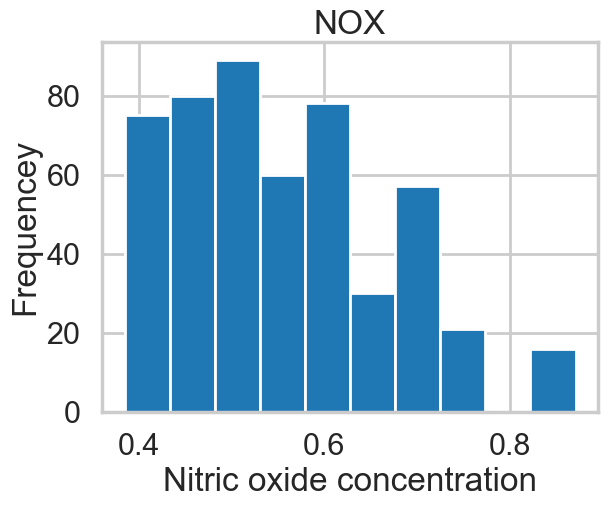

In [158]:
plt.hist(bos.NOX)
plt.title("NOX")
plt.xlabel("Nitric oxide concentration")
plt.ylabel("Frequencey")
plt.show()

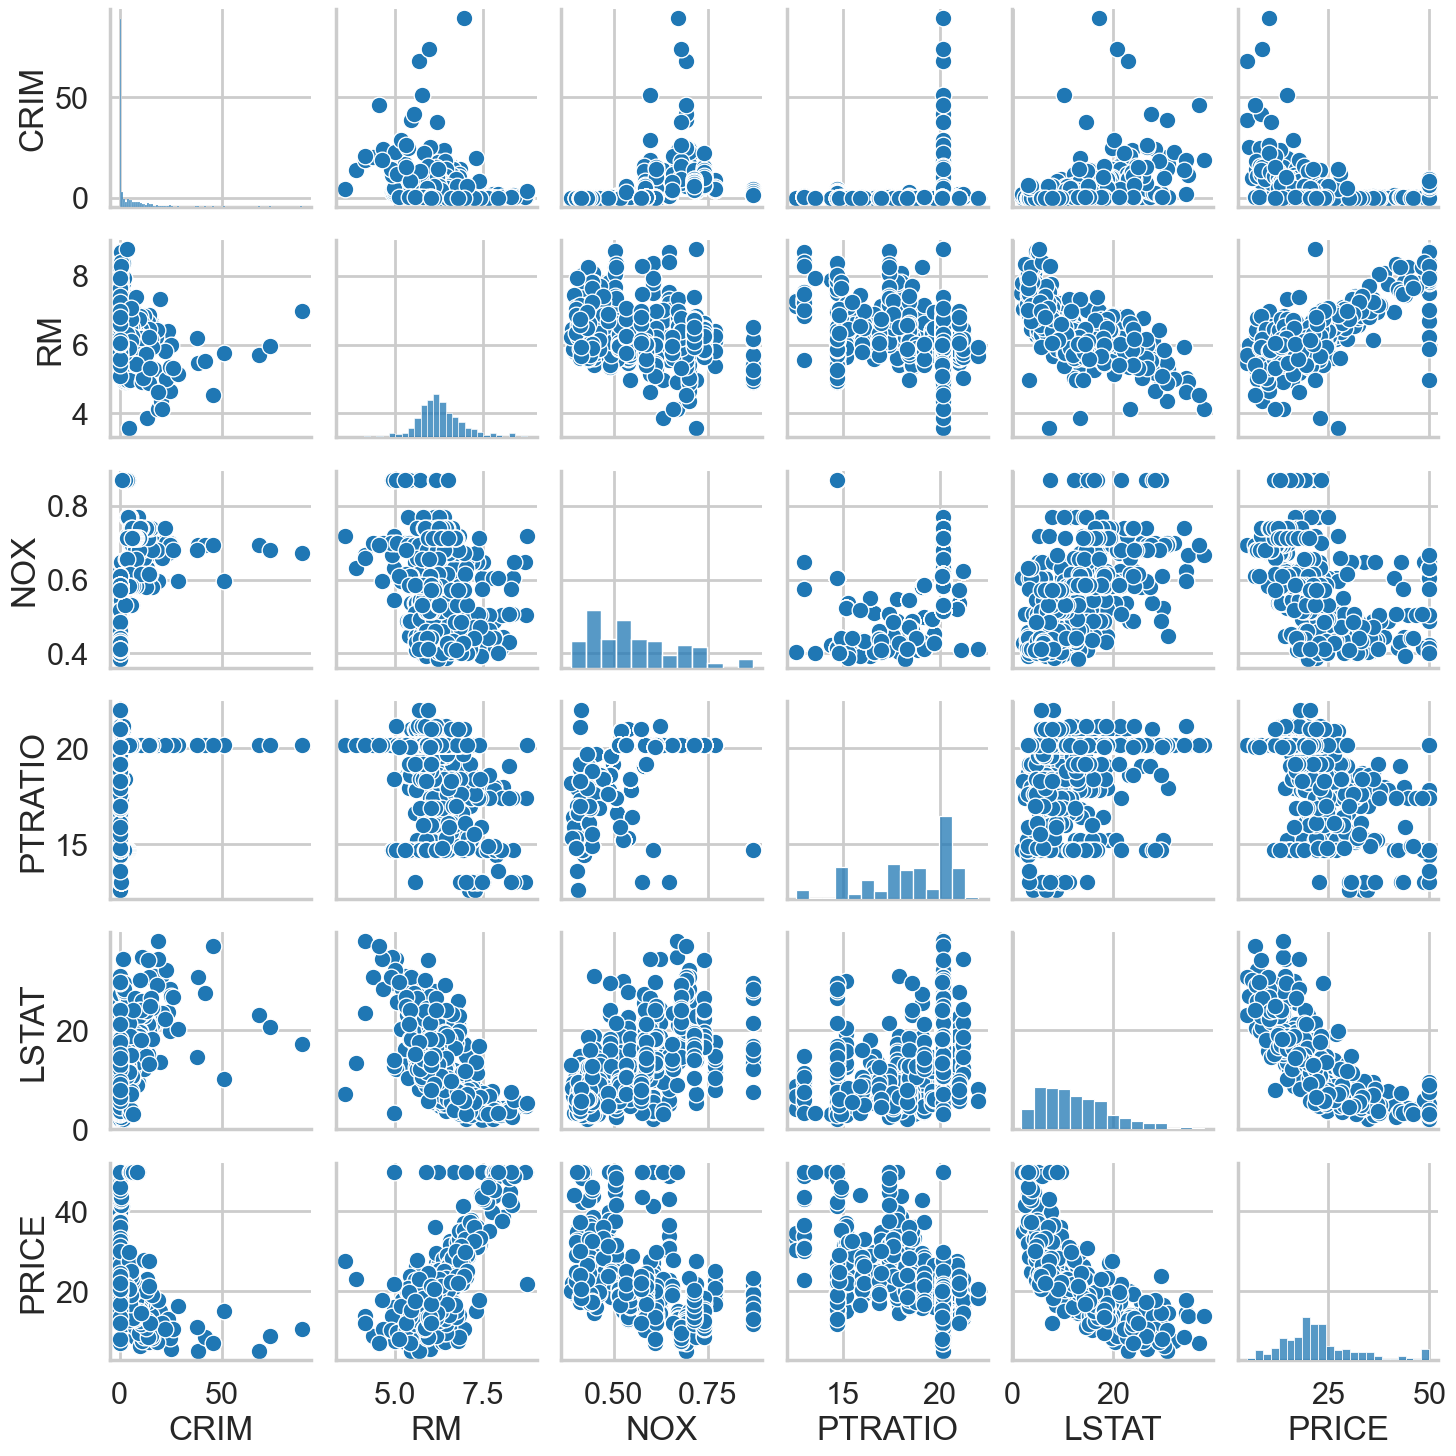

In [159]:
sns.pairplot(bos[['CRIM', 'RM', 'NOX', 'PTRATIO', 'LSTAT', 'PRICE']])
plt.show()

In [160]:
corr_matrix = bos[['CRIM', 'RM', 'NOX', 'PTRATIO', 'LSTAT', 'PRICE']].corr()

threshold = 0.5

styled_corr_matrix = corr_matrix.style.applymap(lambda x: 'background-color: yellow' if abs(x) > threshold and abs(x) < 1 else '')

styled_corr_matrix


C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_22304\1153003953.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_corr_matrix = corr_matrix.style.applymap(lambda x: 'background-color: yellow' if abs(x) > threshold and abs(x) < 1 else '')


,CRIM,RM,NOX,PTRATIO,LSTAT,PRICE
CRIM,1.000000,-0.219247,0.420972,0.289946,0.455621,-0.388305
RM,-0.219247,1.000000,-0.302188,-0.355501,-0.613808,0.695360
NOX,0.420972,-0.302188,1.000000,0.188933,0.590879,-0.427321
PTRATIO,0.289946,-0.355501,0.188933,1.000000,0.374044,-0.507787
LSTAT,0.455621,-0.613808,0.590879,0.374044,1.000000,-0.737663
PRICE,-0.388305,0.695360,-0.427321,-0.507787,-0.737663,1.000000


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [161]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [162]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           2.49e-74
Time:                        11:37:25   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

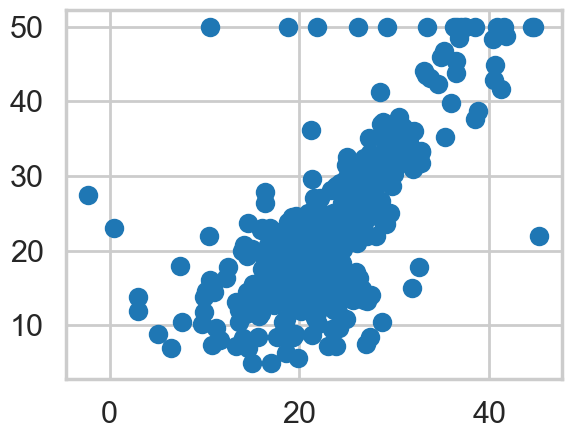

In [163]:
# your turn
plt.scatter(m.fittedvalues, bos.PRICE)
plt.show()

The scatter plot shows a positive correlation between actual prices and predicted prices, indicating that the linear regression model captures some relationship between the variables. However, the model's fit is far from ideal, as many points are scattered away from a perfect linear fit. Several points deviate significantly from the trend line, suggesting the presence of outliers. Additionally, there are multiple data points that are clustered along the horizontal line at 50, indicating potential issues with the model's ability to predict values at the upper price range. These factors suggest that the model needs improvement, potentially through addressing outliers or considering a more complex model.

### Fitting Linear Regression using `sklearn`


In [164]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm 

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [165]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [166]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>A: </b> To not fit an intercept term, I would set the fit_intercept parameter to False when calling LinearRegression(). However, based on the comparison below, where the model with an intercept achieves a better fit than the model without an intercept (R² = 0.74 vs. 0.71), I recommend including the intercept for improved performance.</p>



<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>A: </b> No, it is not enough that the residuals are just normally distributed to satisfy the assumption that residuals must be independently and identically distributed (i.i.d.) in a linear model. Here's why: 

1. Independence:
    Independence means that the residuals are not correlated with each other. In other words, the residuals from one observation should not give any information about the residuals from another observation.
    Even if the residuals are normally distributed, they could still be autocorrelated, meaning that they are dependent on each other. This often occurs in time series data or spatial data, where residuals in nearby time points or locations might be correlated. Independence must be checked separately (e.g., using the Durbin-Watson test for autocorrelation).

2. Identically Distributed:
    Identically distributed means that the residuals have the same variance across all observations (homoscedasticity). If the variance of the residuals changes for different values of the independent variables (heteroscedasticity), this assumption is violated.
    Normality alone does not guarantee identical variance. You could have normally distributed residuals, but if their variance changes across levels of the independent variable (e.g., they "fan out" or "converge"), the identically distributed assumption would still be violated. This can be tested with a residual plot or statistical tests like Breusch-Pagan or White tests for heteroscedasticity.

3. Normal Distribution:
    While the normal distribution of residuals is a desirable property (especially for hypothesis testing, because it makes p-values and confidence intervals valid), it is just one part of the larger assumption.
    Normality helps with inference (e.g., valid t-tests, confidence intervals), but it does not inherently ensure independence or equal variance.

Conclusion:
For residuals to be i.i.d., they must be independent (no autocorrelation) and identically distributed (same variance across observations), in addition to potentially being normally distributed. Therefore, normality alone is not enough to satisfy the i.i.d. assumption. </p>



<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>

<p><b>A: </b> False. The dependent variable Y does not need to be normally distributed for you to use linear regression. Here's why:

Key Points:
    1. Normality of Residuals, Not Y:
        In linear regression, one of the key assumptions is that the residuals (errors), not the dependent variable Y, are normally distributed. This assumption is important because it ensures that the estimates of the coefficients are unbiased, and the hypothesis tests (e.g., t-tests for coefficients) and confidence intervals are valid.
    2. Linear Regression Assumptions: The key assumptions for linear regression are:
        Linearity: The relationship between the independent variables and the dependent variable is linear.
        Independence: The residuals are independent of each other.
        Homoscedasticity: The residuals have constant variance.
        Normality of residuals: The residuals are normally distributed (this matters mostly for inference, such as hypothesis tests and confidence intervals).
    Notice that there is no assumption about the distribution of Y itself. The normality assumption applies to the residuals, which are the differences between the observed values of Y and the values predicted by the model.
    3. Why Y Doesn't Have to Be Normal:
        Y can follow any distribution—normal or non-normal—so long as the residuals from the linear regression model are normally distributed.
        Linear regression can still provide valid estimates of the relationship between X and Y even if Y is skewed or otherwise non-normal, provided the other assumptions are met.

Practical Implications:
    If Y is not normally distributed, it might affect the interpretation of the model or the appearance of the data, but the normality assumption still focuses on residuals.
    In some cases, transformations (e.g., log or square root) are applied to Y to stabilize variance or achieve better linearity, but normality of Y is not a strict requirement.

Summary:
For linear regression, what matters is the normality of residuals, not the normality of the dependent variable Y. Therefore, Y does not have to be normally distributed to use linear regression.</p>

</div>


In [167]:
# your turn
lm2 = LinearRegression(fit_intercept=False)
lm2.fit(X, bos.PRICE)
print('The intercept is:', lm2.intercept_)
print('The R-squared Score without fitting intercept is ', lm2.score(X, bos.PRICE))


The intercept is: 0.0
The R-squared Score without fitting intercept is  0.7137381380515406


In [168]:
lm3 = LinearRegression()
lm3.fit(X, bos.PRICE)
print('The intercept is:', lm3.intercept_)
print('The R-squared Score without fitting intercept is ', lm3.score(X, bos.PRICE))


The intercept is: 36.45948838509025
The R-squared Score without fitting intercept is  0.7406426641094095


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [169]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509025


In [170]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [171]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [172]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [173]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

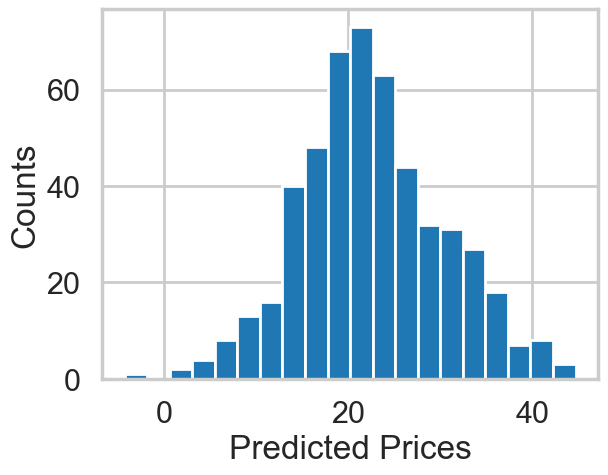

In [174]:
# your turn
plt.hist(lm.predict(X), bins=20)
plt.xlabel('Predicted Prices')
plt.ylabel('Counts')
plt.show()

In [175]:
predicted_price = lm.predict(X)
print(predicted_price[predicted_price<0])

[-4.28131071]


The predicted prices show a roughly normal distribution, ranging from 0 to 40 with a center around 20, although the distribution is slightly skewed towards values above 20. There is one prediction with a negative price, which does not make sense in this context. This negative prediction may be a result of including an intercept in the linear regression model, allowing for predictions below zero. To address this, we could consider modifying the model to fit without an intercept (forcing it through the origin). However, before making this change, it’s important to evaluate whether setting the intercept to zero aligns with the theoretical assumptions about the data, as this can impact model accuracy.

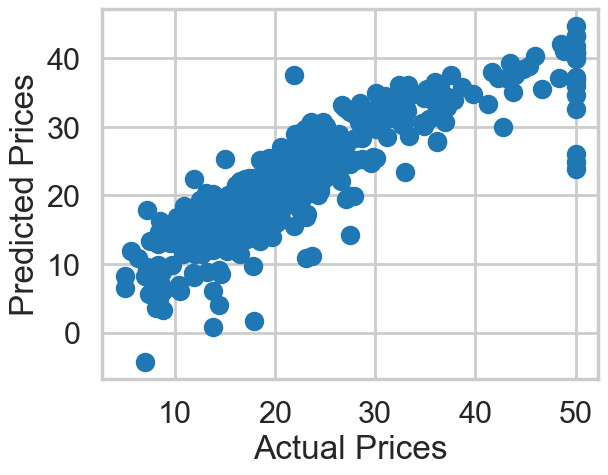

In [176]:
plt.scatter(bos.PRICE, predicted_price)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

Both `statsmodels` and `scikit-learn` are excellent tools for fitting linear models, but they are designed for slightly different purposes. Here's a breakdown of their advantages and disadvantages, along with the unique advantage `statsmodels` provides:

---

### **Advantages of `statsmodels`:**
1. **Detailed Statistical Output:**
   - `statsmodels` provides comprehensive statistical summaries, including:
     - Coefficients
     - p-values
     - Confidence intervals
     - R-squared and adjusted R-squared
     - Diagnostic tests (e.g., Durbin-Watson statistic for autocorrelation).
   - This makes it ideal for tasks requiring rigorous statistical interpretation.
   
2. **Focus on Statistical Inference:**
   - It includes hypothesis testing, confidence intervals, and support for advanced models like time series and generalized linear models.
   - Better suited for interpreting relationships between variables and testing their significance.

3. **Ease of Working with Formulas:**
   - The formula API (`statsmodels.formula.api`) allows fitting models using R-like syntax, which simplifies model specification (e.g., `y ~ x1 + x2`).

4. **Built-in Diagnostics:**
   - Provides diagnostic tools for model validation, including residual plots and tests for assumptions like normality and heteroscedasticity.

---

### **Advantages of `scikit-learn`:**
1. **Versatility:**
   - `scikit-learn` is part of a larger ecosystem for machine learning, with tools for preprocessing, pipeline creation, and a wide range of algorithms.
   - Designed for predictive modeling and works seamlessly for tasks like cross-validation, hyperparameter tuning, and feature selection.

2. **Ease of Integration:**
   - Well-suited for integration into machine learning pipelines and workflows.
   - Works natively with NumPy and pandas, which makes preprocessing and scaling easy.

3. **Focus on Prediction:**
   - Primarily aimed at building models for prediction rather than statistical inference.

4. **Speed and Simplicity:**
   - Faster to set up and use for quick prototyping, especially for large datasets.

---

### **Disadvantages of `statsmodels`:**
1. **Limited Focus on Machine Learning:**
   - Lacks built-in tools for tasks like cross-validation and hyperparameter tuning.
   - Not designed for predictive workflows or deployment pipelines.

2. **Less Intuitive for Beginners:**
   - While the formula API is convenient, interpreting and setting up the design matrix can be challenging for beginners.

---

### **Disadvantages of `scikit-learn`:**
1. **Lack of Detailed Statistical Output:**
   - Provides minimal information about the model fit (e.g., coefficients and R-squared) and lacks tools for statistical inference or hypothesis testing.
   - Limited diagnostics for model assumptions.

2. **Focus on Predictive Accuracy:**
   - It prioritizes predictive accuracy over interpretability, which may not be ideal for researchers or analysts interested in understanding relationships between variables.

---

### **Unique Advantage of `statsmodels`:**
The biggest advantage of `statsmodels` is **its emphasis on statistical inference and detailed diagnostic tools**. If you need to understand the relationships between variables, test hypotheses, or validate assumptions, `statsmodels` provides far more detailed insights than `scikit-learn`. For example:
- You can easily determine whether individual predictors are statistically significant using p-values.
- Confidence intervals for coefficients are provided directly in the summary output.
- Residual diagnostics are readily available for evaluating model fit.

In contrast, `scikit-learn` would require additional coding and external libraries for these tasks.

---

### **When to Use Each:**
- Use **`statsmodels`** when your primary goal is **statistical analysis and inference**, such as understanding the significance and effect sizes of predictors.
- Use **`scikit-learn`** when your primary goal is **predictive modeling** or when you're working in a machine learning pipeline requiring preprocessing, feature engineering, or hyperparameter optimization. 

Combining both libraries in a single workflow can also be effective, leveraging their strengths for different aspects of your analysis.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [177]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954975


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [178]:
print(np.sum(
    (lm.predict(X) - np.mean(bos.PRICE)) ** 2
    ))

31637.51083706472


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [179]:
# your turn
lm_ptratio = ols('PRICE ~ PTRATIO', bos).fit()
print(lm_ptratio.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.61e-34
Time:                        11:37:26   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

#### Interpreting coefficients

Concentrating on the coefficient table (middle table). I can interpret the `PTRATIO` coefficient (-2.1572) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the value of PTRATIO, `PTRATIO`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `PTRATIO` of -2.1572 means that *on average, each unit is associated with an decrease of $\$2,157.2$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$-2,477, \$-1,837$). 

R^2 value is 0.258. This means that the proportion of the variance in the response variable Price that can be explained by the linear regression model is 0.258. 

F-statistic is 175.1, meaning that the ratio of the mean sum of squares for the regression (MSR) to the mean sum of squares for the error (MSE) is 175.1. This large F-statistic indicates that the variation explained by the model is much greater than the variation left unexpained, after accounting for the degrees of freedom. This suggests that the predictor PTRATIO collectively provide a statistically significant explanation of the dependent variable PRICE. In other word, this strong result indicates that the model is highly significant. However, the relatively low R^2 = 0.258 indicates that, while the model is statistically significant, it expains only a modest proportion (25.8%) of the total variance in the dependent variable Price. 

The t-statistic for the regression coefficient is -13.233, whose square is equal to the F-statistic, 175.1. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [180]:
# your turn
m3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           6.15e-98
Time:                        11:37:26   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

F-statistic is 245.2, meaning that the ratio of the mean sum of squares for the regression (MSR) to the mean sum of squares for the error (MSE) is 245.2. This large F-statistic indicates that the variation explained by the model is much greater than the variation left unexpained, after accounting for the degrees of freedom. This suggests that the three predictors collectively provide a statistically significant explanation of the dependent variable PRICE. In other word, this strong result indicates that the model is highly significant.

R^2 is 0.594, indicating that this model expains 59.4% of the total variance in the dependent variable, Price, which outperforms the previous linear regression model fitted using only 'PTRATIO', whose R^2 value is 0.258.  

Since the p-values (P>|t|) for all three variables are close to zero, it can be concluded that all of them are significant in predicting house pricing. The coefficients for CRIM, RM and PTRATIO are -0.2050, 7.3804, and -1.0695 respectively. In other words, the housing price is negatively correlated with CRIM and PTRATIO, but positively correlated with RM. For each unit increase in CRIM, RM or PTRATIO, the house price would decrease by 0.205 units, increase by 7.3804 units, or decrease by 1.0695 units, respectively, assuming other variables remain constant. As for the intercept, its p-value is larger than 0.05 (a commonly used criterion of statistical significance), indicating that it is not significant in predicting house pricing. This finding indicates that, in this housing market, crime rate, the average number of rooms, and school quality significantly impact house prices. Buyers seem willing to pay more for houses in areas with lower crime, better school systems, and larger homes. For example, a family looking for a spacious house in a safe neighborhood with quality schools would likely encounter higher prices. Conversely, properties in areas with high crime rates and poor schools tend to be more affordable. These findings align with general preferences in real estate, where safety, space, and education are top priorities for homebuyers.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [181]:
# Add one more variable, LSTAT, to the model we built in Part 3. 
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     268.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          5.84e-123
Time:                        11:37:26   Log-Likelihood:                -1550.8
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9233      3.976      4.257      0.0

The AIC for the new model m4 is 3112, which is lower than that of model m3 built in Part 3 (3232), indicating that model m4 with variable LSTAT included is the better model. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

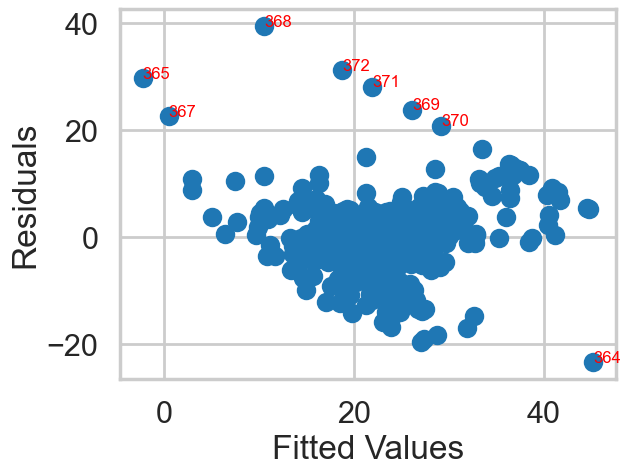

In [182]:
# Exercise:Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?
# use model m (fitting RM only) in Part 3
residuals = bos.PRICE - m.fittedvalues
plt.scatter(m.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

for i, (x, y) in enumerate(zip(m.fittedvalues, residuals)): 
    if y > 20 or y < -20:
        plt.annotate(i, (x, y), fontsize=12, color='red')

plt.show()

This residuals vs. fitted values plot shows that while most residuals are scattered around zero, indicating reasonable model predictions overall, there is a noticeable pattern of increasing residuals at both low and high fitted values. This suggests potential non-linearity or systematic bias in the model, as the residuals are not randomly distributed. Additionally, several points with high positive residuals are labeled (e.g., 365, 368, 372), indicating outliers or instances where the model significantly underestimates the observed values. This pattern warrants further investigation into the model's assumptions or the inclusion of additional predictors.

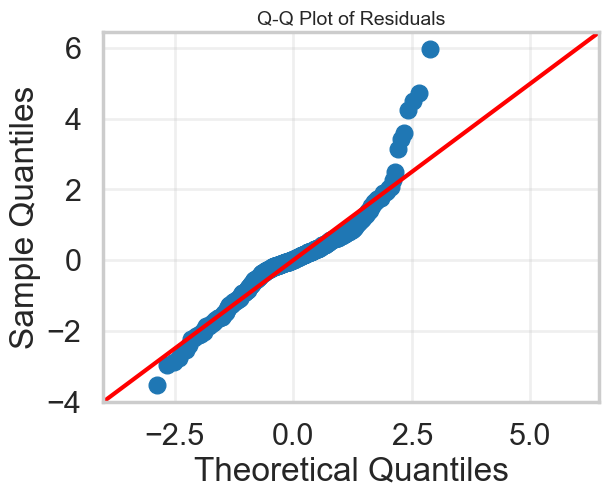

In [203]:
# Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
sm.qqplot(residuals, line='45', fit=True) # Generate Q-Q plot
plt.title('Q-Q Plot of Residuals', fontsize=14)
plt.grid(alpha=0.3)
   
plt.show()

The Q-Q plot indicates that the residuals are approximately normally distributed, with minor deviation in the lower tail and significant deviations in the upper tail. Specifically, one observed residual in the extreme negative range (lower quantiles) are slightly more negative than expected under perfect normality, while seven observed residuals in the extreme positive range (higher quantiles) are considerably more positive than expected. These deviations suggest that the assumption of normality may not hold, raising concerns for further analysis.

# Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

The **Residuals vs. Fitted plot** and the **Q-Q plot** are diagnostic tools in regression analysis, but they have different purposes and advantages/disadvantages:

### **Residuals vs. Fitted Plot**:
- **Purpose**: Helps detect non-linearity, heteroscedasticity (non-constant variance of residuals), and outliers.
  
#### **Advantages**:
1. **Identifying patterns**: Clear visualization of systematic patterns in residuals, indicating model misfit.
2. **Detecting heteroscedasticity**: Reveals whether variance changes with fitted values.
3. **Spotting influential points**: Outliers and influential data points stand out clearly.

#### **Disadvantages**:
1. **Normality assumption not checked**: Cannot assess whether residuals are normally distributed.
2. **Limited to heteroscedasticity and non-linearity**: Doesn't explicitly test for other assumptions like independence of errors.

---

### **Q-Q Plot**:
- **Purpose**: Evaluates whether residuals follow a normal distribution.

#### **Advantages**:
1. **Assessing normality**: Directly checks if residuals are approximately normal (a key regression assumption).
2. **Identifies heavy tails**: Indicates whether data have skewness or kurtosis issues.

#### **Disadvantages**:
1. **No heteroscedasticity check**: Cannot assess if the variance of residuals changes with the fitted values.
2. **Limited scope**: Doesn't detect non-linearity or systematic patterns in the data.

---

### **Comparison**:
- Use the **Residuals vs. Fitted plot** to diagnose **model fit issues** like non-linearity or unequal variance.
- Use the **Q-Q plot** to assess whether the residuals are normally distributed (important for statistical tests like confidence intervals and hypothesis testing).
- Together, they complement each other to give a fuller picture of model diagnostics.

In [184]:
#<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.
Price_residual = pd.DataFrame({'RM': bos.RM, 'Price': bos.PRICE, 'Fitted Value': m.fittedvalues, 'Residual':residuals})[['RM', 'Price', 'Fitted Value', 'Residual']]
Price_residual.head()

,RM,Price,Fitted Value,Residual
0,6.575,24.0,25.175746,-1.175746
1,6.421,21.6,23.774021,-2.174021
2,7.185,34.7,30.728032,3.971968
3,6.998,33.4,29.025938,4.374062
4,7.147,36.2,30.382152,5.817848


In [185]:
Outliers = Price_residual[(Price_residual.Residual > 20) | (Price_residual.Residual < -20)]
Outliers_indices = Outliers.index

In [186]:
print(Outliers)

        RM  Price  Fitted Value   Residual
364  8.780   21.9     45.245896 -23.345896
365  3.561   27.5     -2.258011  29.758011
367  3.863   23.1      0.490826  22.609174
368  4.970   50.0     10.566861  39.433139
369  6.683   50.0     26.158774  23.841226
370  7.016   50.0     29.189776  20.810224
371  6.216   50.0     21.908089  28.091911
372  5.875   50.0     18.804269  31.195731


In [187]:
print(bos.loc[Outliers_indices])

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
364   3.47428  0.0   18.1   1.0  0.718  8.780   82.9  1.9047  24.0  666.0   
365   4.55587  0.0   18.1   0.0  0.718  3.561   87.9  1.6132  24.0  666.0   
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
368   4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369   5.66998  0.0   18.1   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  PRICE  
364     20.2  354.55   5.29   21.9  
365     20.2  354.70   7.12   27.5  
367     20.2  131.42  13.33   23.1  
368     20.2  375.52   3.26   50.0  
369     20.2  375.33   3.73   50.0  
370     20.2  392.05   2.96   50.0  
371     20.2  366.15   9.53   50.0  
372     20

Based on the criterion that an absolute residual > 20 constitutes an outlier, a total of 8 outliers have been identified. Notably, their indices are consecutive, ranging from 364 to 372, with a single gap at 366. This pattern suggests that these outliers may originate from a population different from the rest of the records, possibly linked to the early stages of data collection. Further investigation is warranted to explore this possibility.

In [188]:
#<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

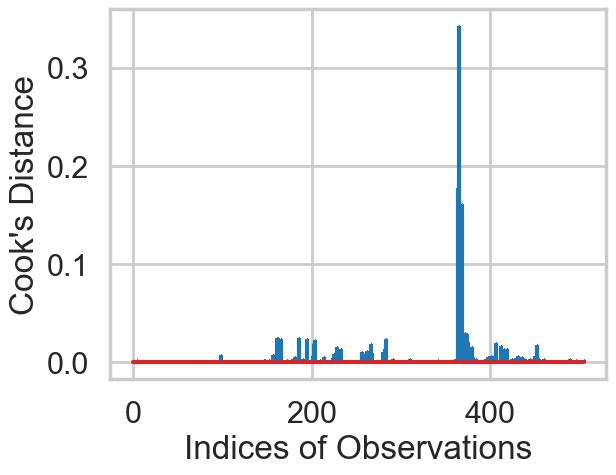

In [189]:
influence = m.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=',')
plt.xlabel('Indices of Observations')
plt.ylabel("Cook's Distance")
plt.show()

This plot reveals that a few consecutive observations around index 370 have notably high Cook's Distance values, suggesting these are influential data points and may be outliers. This consecutivity suggests that these outliers may originate from a population different from the rest of the records. Further investigation is warranted to explore this possibility.

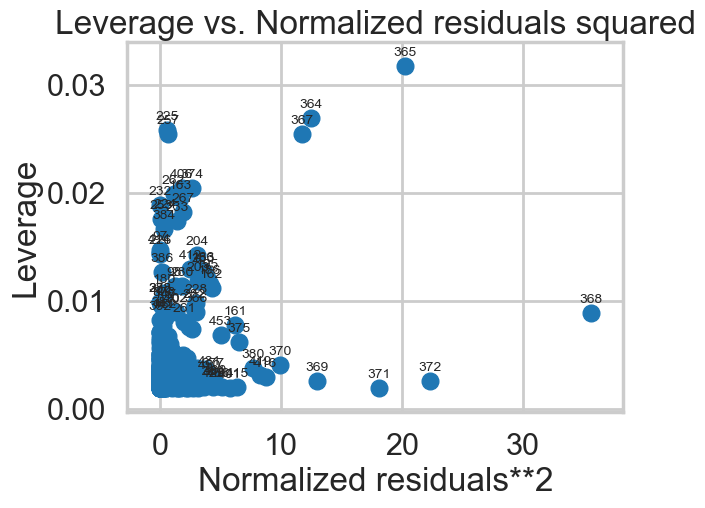

In [190]:
# Plot residuals against leverage using Statsmodels' builtin function
from statsmodels.graphics.regressionplots import *
fig, ax = plt.subplots()
plot_leverage_resid2(m, ax=ax)

for text in ax.texts:
    text.set_fontsize(10)
    
plt.show()

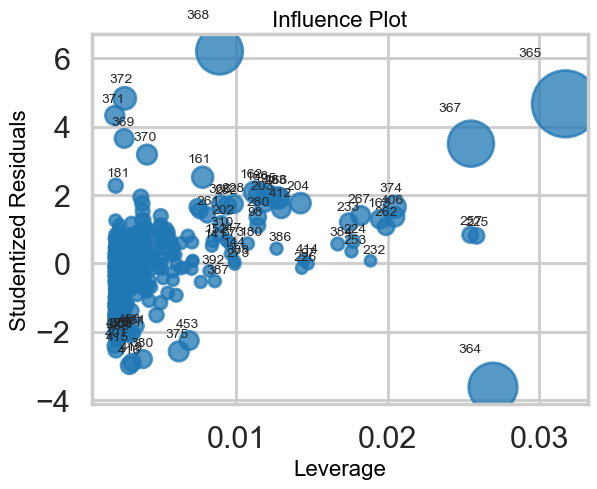

In [191]:
fig, ax = plt.subplots()
influence_plot(m, ax=ax, criterion="cooks")

for text in ax.texts:
    text.set_fontsize(10)
    
plt.show()

Points 368, 365, 367, and 364 are larger than others, suggesting they are influential and have a significant impact on the regression model, warranting further investigation. 

In [192]:
#<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

In [193]:
bos_outlier_rem = bos.drop(index=Outliers_indices)
m_outlier_rem = ols('PRICE ~ RM', bos_outlier_rem).fit()
print(m_outlier_rem.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     748.5
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          3.80e-101
Time:                        11:37:27   Log-Likelihood:                -1562.6
No. Observations:                 498   AIC:                             3129.
Df Residuals:                     496   BIC:                             3138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.5810      2.346    -17.722      0.0

Removing the eight outliers significantly improves the linear regression fit, as evidenced by an increase in the R-squared value from 0.484 to 0.601, a rise in the F-statistic from 471.8 to 748.5 and a reduction in the AIC from 3350 to 3129. 